<a href="https://colab.research.google.com/github/sniggel/colab-repo/blob/master/Week4_Notes-Loading_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2019-04-24 16:16:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   106MB/s    in 1.3s    

2019-04-24 16:16:56 (106 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

['horse27-9.png', 'horse43-5.png', 'horse43-9.png', 'horse13-7.png', 'horse16-4.png', 'horse47-8.png', 'horse35-1.png', 'horse29-7.png', 'horse44-8.png', 'horse37-9.png']
['human07-17.png', 'human12-08.png', 'human08-21.png', 'human03-06.png', 'human05-25.png', 'human09-28.png', 'human09-15.png', 'human09-05.png', 'human13-13.png', 'human15-27.png']
total training horse images: 500
total training

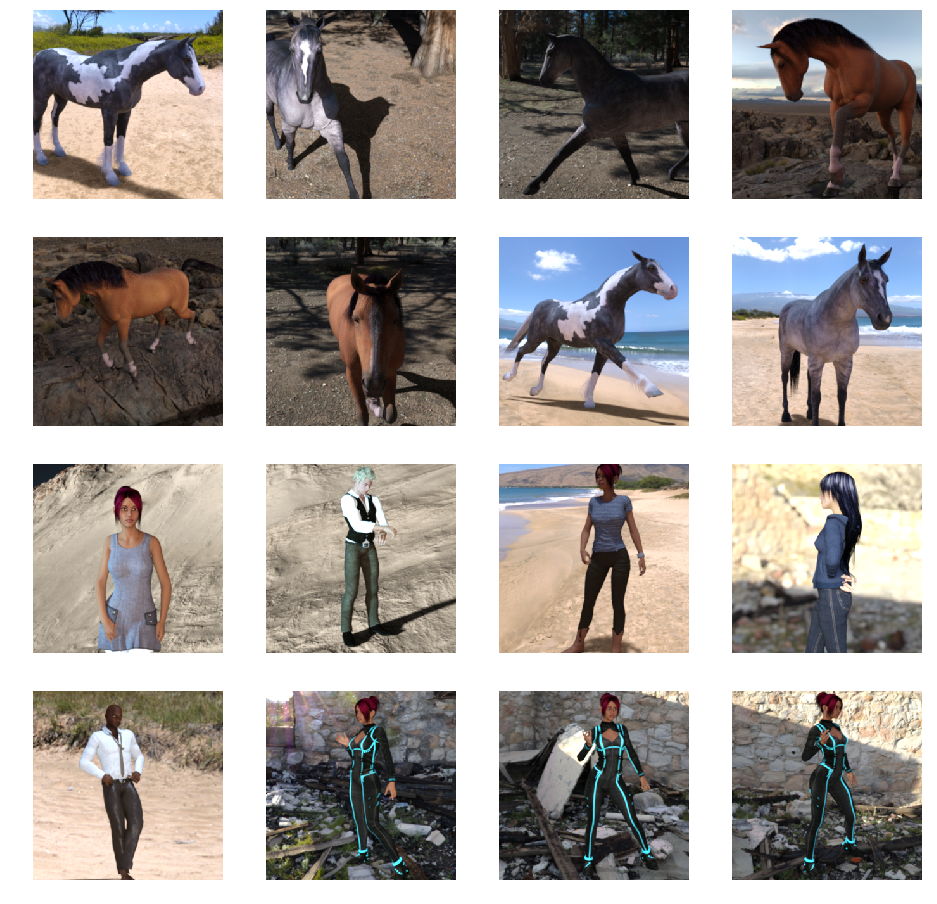

In [1]:
%matplotlib inline

import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Download zip dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

## Extract dataset to /tmp/horse-or-human
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

## Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

## Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

## Print horses filenames
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

## Print human filenames
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

## Print total training horse and human images
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()